# 01 — Data Exploration (EDA)

In this notebook we explore the **HAM10000** dataset to understand:
- How many images per class (class distribution)
- What the images look like (sample grid)
- Image dimensions and properties
- Class imbalance — and why it matters for medical data

> **Dataset:** HAM10000 — 10,015 dermatoscopic images of 7 skin lesion types

---

## Setup

**Before running this notebook:**
1. Download HAM10000 from Kaggle: search "Skin Cancer MNIST: HAM10000"
2. Extract into `data/HAM10000/`
3. You should have:
   - `data/HAM10000/HAM10000_images_part_1/` (images)
   - `data/HAM10000/HAM10000_images_part_2/` (images)
   - `data/HAM10000/HAM10000_metadata.csv` (labels)

Or run the download cell below if you have the Kaggle API set up.

In [ ]:
# OPTIONAL: Download dataset via Kaggle API
# Uncomment the lines below if you have kaggle CLI installed
# !pip install kaggle
# !kaggle datasets download -d kmader/skin-cancer-mnist-ham10000 -p ../data/HAM10000 --unzip

In [1]:
import sys
sys.path.append('..')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
from collections import Counter

from src.config import DATA_DIR, CLASS_NAMES, CLASS_LABELS, RESULTS_DIR

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 120

# Verify data folder
print(f'Data dir: {DATA_DIR}')
if DATA_DIR.exists():
    print(f'Contents: {os.listdir(DATA_DIR)}')
else:
    print('ERROR: Data folder not found!')
    print('Download HAM10000 from Kaggle and extract to data/HAM10000/')

print('\nSetup complete!')

Data dir: D:\Projects\Vision_something\data\HAM10000
Contents: ['HAM10000_images_part_1', 'HAM10000_images_part_2', 'HAM10000_metadata.csv', 'hmnist_28_28_L.csv', 'hmnist_28_28_RGB.csv', 'hmnist_8_8_L.csv', 'hmnist_8_8_RGB.csv']

Setup complete!


---
## 1. Load Metadata

In [2]:
# Load the metadata CSV
metadata_path = DATA_DIR / 'HAM10000_metadata.csv'
df = pd.read_csv(metadata_path)

print(f'Total samples: {len(df)}')
print(f'Columns: {list(df.columns)}')
print()
df.head(10)

Total samples: 10015
Columns: ['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization']



lesion_id      image_id   dx dx_type   age     sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0    male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0    male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0    male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0    male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0    male          ear
5  HAM_0001466  ISIC_0027850  bkl   histo  75.0    male          ear
6  HAM_0002761  ISIC_0029176  bkl   histo  60.0    male         face
7  HAM_0002761  ISIC_0029068  bkl   histo  60.0    male         face
8  HAM_0005132  ISIC_0025837  bkl   histo  70.0  female         back
9  HAM_0005132  ISIC_0025209  bkl   histo  70.0  female         back

In [3]:
# Basic info
print('Data types:')
print(df.dtypes)
print()
print('Missing values:')
print(df.isnull().sum())
print()
print('Unique values per column:')
for col in df.columns:
    print(f'  {col}: {df[col].nunique()}')

Data types:
lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dtype: object

Missing values:
lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

Unique values per column:
  lesion_id: 7470
  image_id: 10015
  dx: 7
  dx_type: 4
  age: 18
  sex: 3
  localization: 15


---
## 2. Class Distribution

This is **the most important chart** for understanding our data.
Medical datasets are almost always imbalanced — some conditions are much more common than others.

In [4]:
# Count per class
class_counts = df['dx'].value_counts()
print('Samples per class:')
for cls, count in class_counts.items():
    label = CLASS_LABELS.get(cls, cls)
    pct = count / len(df) * 100
    print(f'  {label:30s}  ({cls})  ->  {count:5d}  ({pct:.1f}%)')

Samples per class:
  Melanocytic Nevus               (nv)  ->   6705  (66.9%)
  Melanoma                        (mel)  ->   1113  (11.1%)
  Benign Keratosis                (bkl)  ->   1099  (11.0%)
  Basal Cell Carcinoma            (bcc)  ->    514  (5.1%)
  Actinic Keratosis               (akiec)  ->    327  (3.3%)
  Vascular Lesion                 (vasc)  ->    142  (1.4%)
  Dermatofibroma                  (df)  ->    115  (1.1%)


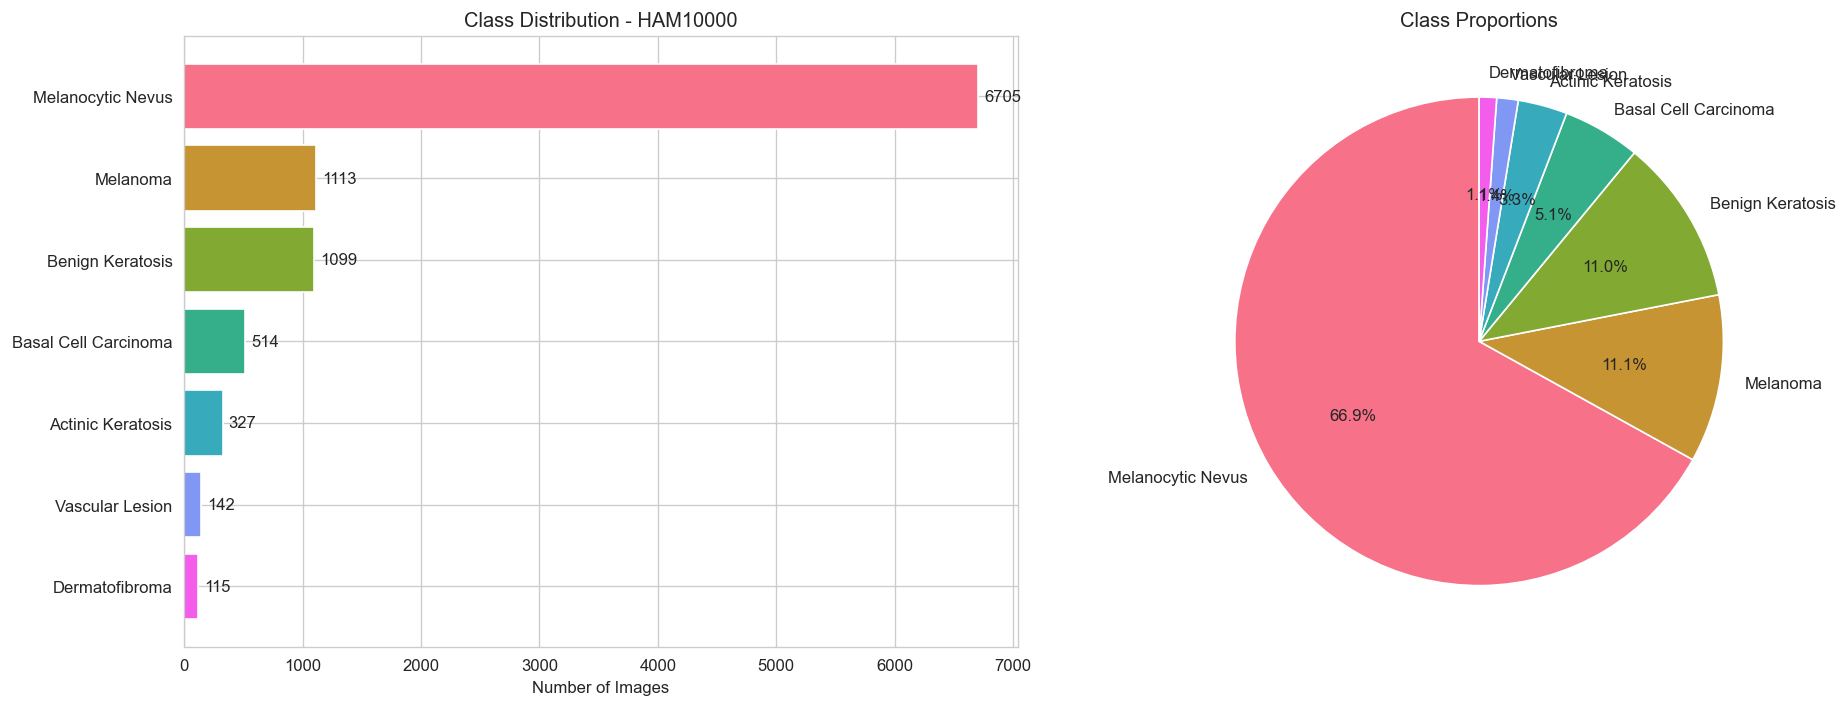


Saved to D:\Projects\Vision_something\results\class_distribution.png


In [5]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
labels = [CLASS_LABELS[c] for c in class_counts.index]
colors = sns.color_palette('husl', len(class_counts))

bars = axes[0].barh(labels, class_counts.values, color=colors)
axes[0].set_xlabel('Number of Images')
axes[0].set_title('Class Distribution - HAM10000')
axes[0].invert_yaxis()

# Add count labels on bars
for bar, count in zip(bars, class_counts.values):
    axes[0].text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2,
                 f'{count}', va='center', fontsize=10)

# Pie chart
axes[1].pie(class_counts.values, labels=labels, autopct='%1.1f%%',
            colors=colors, startangle=90)
axes[1].set_title('Class Proportions')

plt.tight_layout()
fig.savefig(RESULTS_DIR / 'class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f'\nSaved to {RESULTS_DIR / "class_distribution.png"}')

### Key Observation: Class Imbalance

**What we see:**
- **Melanocytic Nevus (nv)** dominates the dataset with ~67% of all images (6,705 out of 10,015)
- **Dermatofibroma (df)** has only 115 images (1.1%) — that's **58x less** than nv!
- The top 3 classes (nv, mel, bkl) account for ~89% of the data

**Why this matters:**
- If a model just predicted "nv" for everything, it would be **67% accurate** — but completely useless!
- Rare classes like **Vascular Lesion** and **Dermatofibroma** are harder to learn because the model sees so few examples
- This is typical in medical datasets — common conditions are... common

**How we'll handle it in training:**
- **Weighted loss function** — penalize misclassifying rare classes more heavily
- **Data augmentation** — artificially generate more training samples (flips, rotations, color changes)
- **Stratified splitting** — ensure all classes are proportionally represented in train/val/test sets
- **Metrics beyond accuracy** — we'll use precision, recall, and F1-score per class

---
## 3. Sample Images

Let's see what each class actually looks like.

In [6]:
# Build a lookup: image_id -> file path
# HAM10000 splits images across two folders
image_dirs = [
    DATA_DIR / 'HAM10000_images_part_1',
    DATA_DIR / 'HAM10000_images_part_2',
]

# Build a dict for fast lookup
image_path_map = {}
for d in image_dirs:
    if d.exists():
        for f in d.iterdir():
            if f.suffix == '.jpg':
                image_path_map[f.stem] = f

print(f'Found {len(image_path_map)} images')

def find_image(image_id):
    return image_path_map.get(image_id)

# Quick test
sample_id = df['image_id'].iloc[0]
path = find_image(sample_id)
if path:
    img = Image.open(path)
    print(f'Sample image: {path.name} | Size: {img.size} | Mode: {img.mode}')
else:
    print(f'ERROR: Could not find image {sample_id}')

Found 10015 images
Sample image: ISIC_0027419.jpg | Size: (600, 450) | Mode: RGB


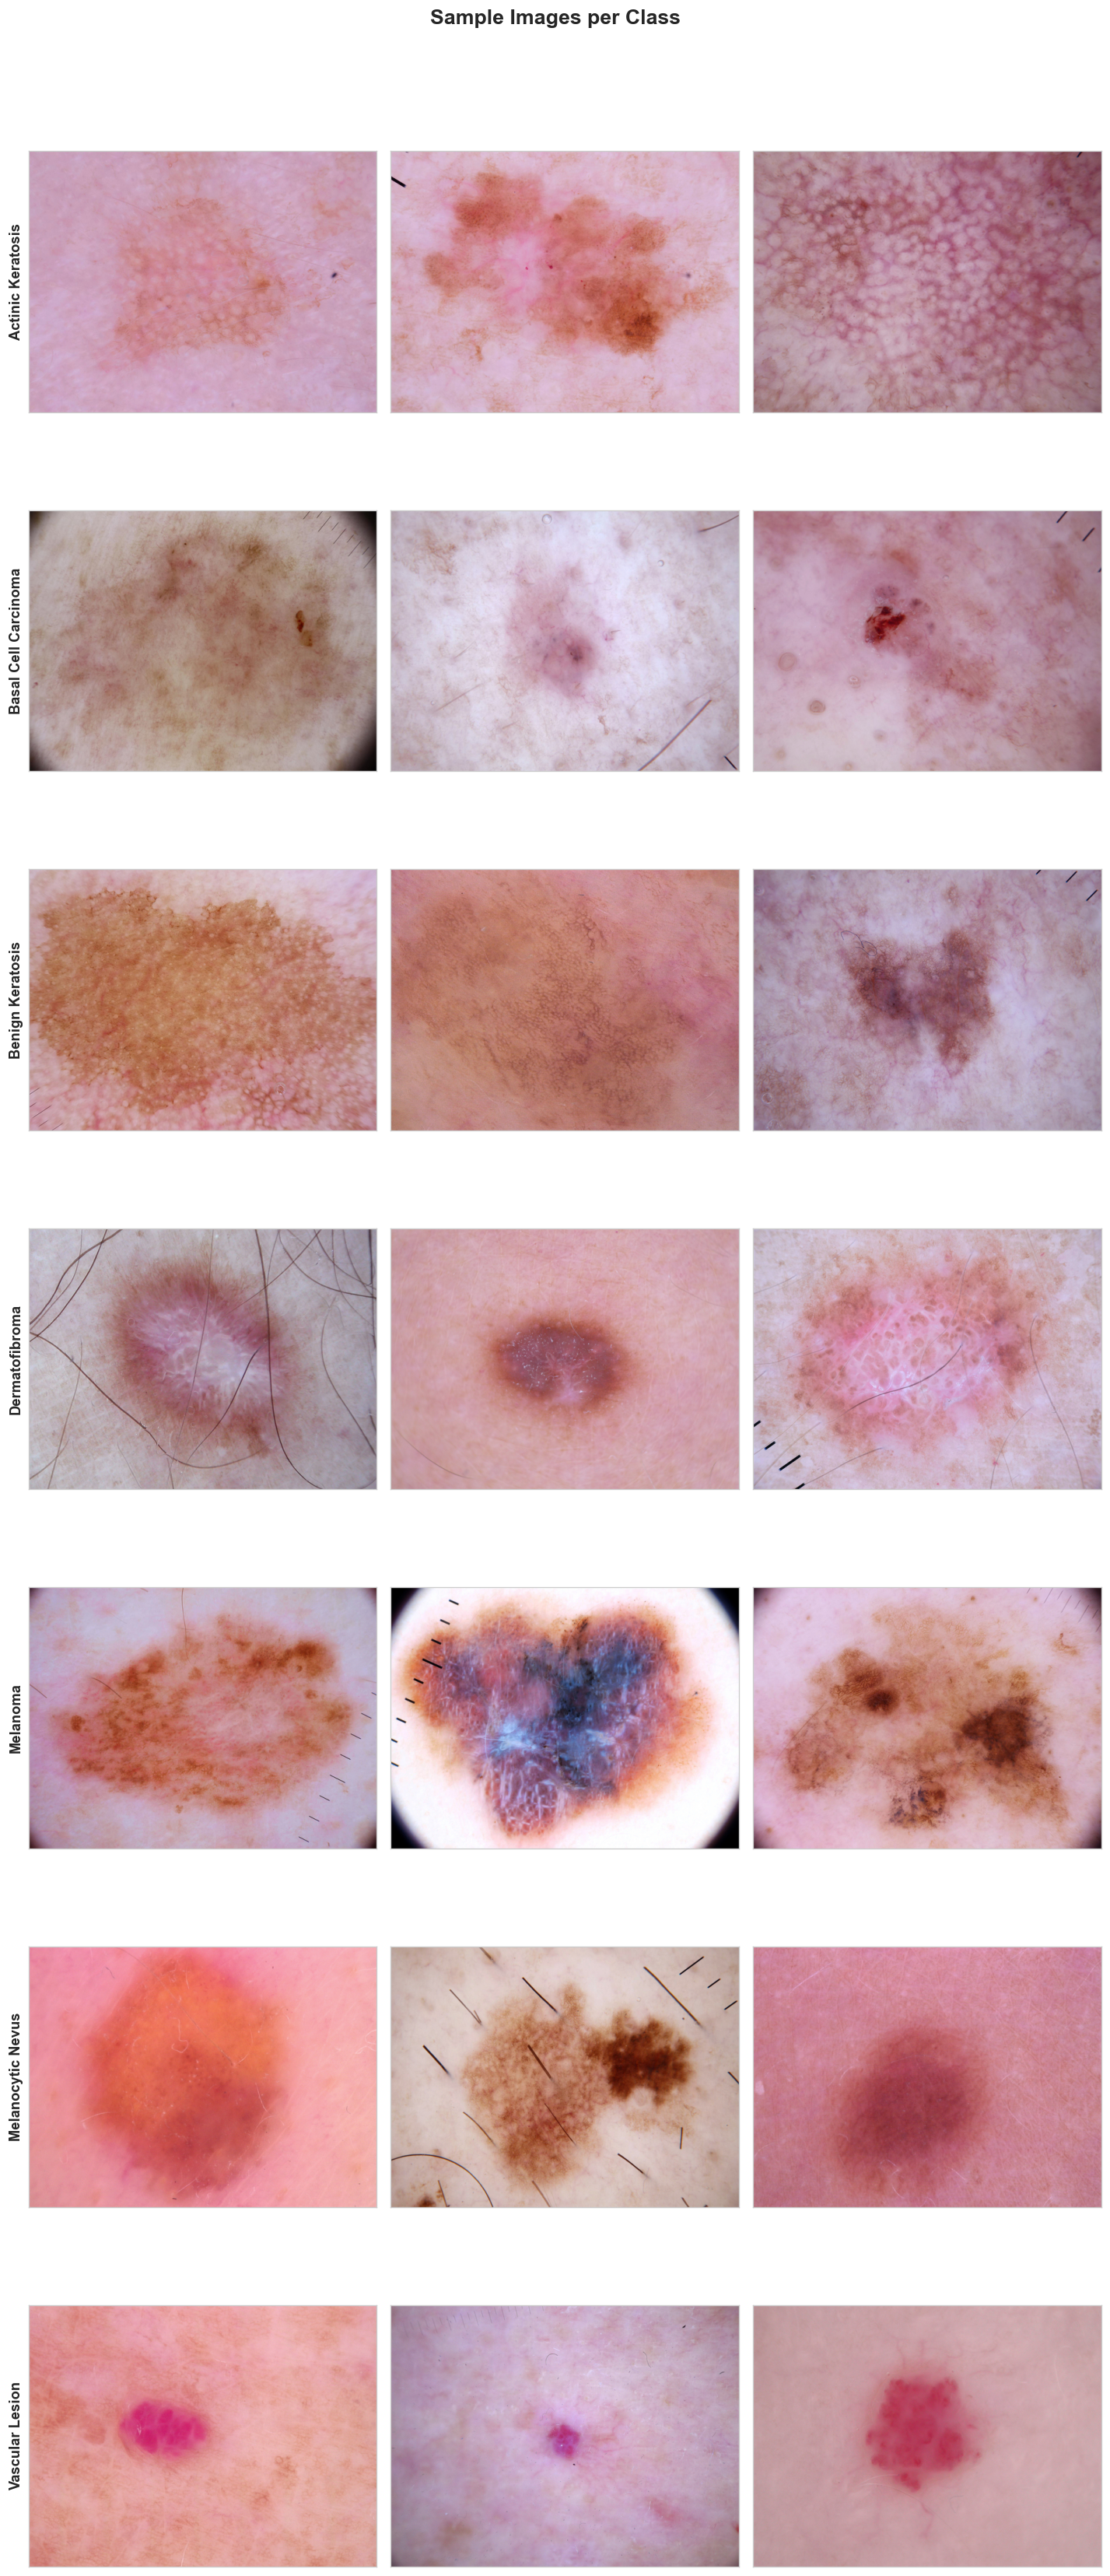

In [7]:
# Show sample images per class (3 samples each)
n_samples = 3
fig, axes = plt.subplots(len(CLASS_NAMES), n_samples, figsize=(12, 4 * len(CLASS_NAMES)))

for row, cls in enumerate(CLASS_NAMES):
    class_df = df[df['dx'] == cls].sample(n=n_samples, random_state=42)

    for col, (_, sample) in enumerate(class_df.iterrows()):
        img_path = find_image(sample['image_id'])
        if img_path:
            img = Image.open(img_path)
            axes[row, col].imshow(img)

        if col == 0:
            axes[row, col].set_ylabel(CLASS_LABELS[cls], fontsize=11, fontweight='bold')

        axes[row, col].set_xticks([])
        axes[row, col].set_yticks([])

plt.suptitle('Sample Images per Class', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
fig.savefig(RESULTS_DIR / 'sample_images.png', dpi=150, bbox_inches='tight')
plt.show()

### What do we see in the images?

**Visual patterns a dermatologist (and our model) looks for:**
- **Melanocytic Nevus (nv)** — Common moles. Usually round, brown, uniform color. These are benign
- **Melanoma (mel)** — The dangerous one. Often asymmetric, irregular borders, multiple colors (brown, black, red)
- **Basal Cell Carcinoma (bcc)** — Pearly/waxy bumps, sometimes with visible blood vessels
- **Benign Keratosis (bkl)** — Rough, scaly patches. Waxy "stuck-on" appearance
- **Actinic Keratosis (akiec)** — Rough, scaly patches from sun damage. Can become cancerous
- **Dermatofibroma (df)** — Small, hard bumps. Usually brownish
- **Vascular Lesion (vasc)** — Red/purple marks from blood vessel abnormalities

**Key takeaway:** Even for trained dermatologists, some of these look very similar! That's why AI-assisted diagnosis is valuable — the model can pick up on subtle patterns humans might miss.

**Challenge for our model:** The visual differences between some classes are very subtle (e.g., akiec vs bkl), making this a genuinely difficult classification problem.

---
## 4. Image Properties

### Image Properties — What this tells us

**Key finding:** All images are **600x450 pixels** — the dataset is already standardized!

**Why we still resize to 128x128:**
- **Memory**: A 600x450 RGB image = 810,000 values. At 128x128 = only 49,152 values — **16x smaller**
- **Speed**: Smaller images = faster training, especially important on CPU
- **Pretrained models**: EfficientNet expects square images, so we resize anyway
- **Trade-off**: We lose some fine detail, but 128x128 retains enough information for classification. For production medical AI, you'd use 224x224 or higher with a GPU

In [8]:
# Check image dimensions for a random sample
sample_df = df.sample(n=200, random_state=42)
widths = []
heights = []

for _, row in sample_df.iterrows():
    img_path = find_image(row['image_id'])
    if img_path:
        img = Image.open(img_path)
        widths.append(img.size[0])
        heights.append(img.size[1])

print(f'Image dimensions (sample of {len(widths)}):')
print(f'  Width  - min: {min(widths)}, max: {max(widths)}, mean: {np.mean(widths):.0f}')
print(f'  Height - min: {min(heights)}, max: {max(heights)}, mean: {np.mean(heights):.0f}')
print(f'  Most common size: {Counter(zip(widths, heights)).most_common(1)[0]}')

Image dimensions (sample of 200):
  Width  - min: 600, max: 600, mean: 600
  Height - min: 450, max: 450, mean: 450
  Most common size: ((600, 450), 200)


### Patient/Lesion Analysis — Why this matters

**What we found:**
- 10,015 images come from only **7,470 unique lesions**
- Some lesions have up to **6 images** (different angles, lighting, zoom levels)
- Average: 1.3 images per lesion

**Why this is critical — Data Leakage:**
- If images of the **same lesion** end up in both training and test sets, the model can "cheat"
- It would recognize the specific lesion rather than learning general patterns
- This would give us **artificially inflated accuracy** that doesn't reflect real-world performance

**What we do about it:**
- In our training notebook, we use **stratified splitting by class** to ensure fair distribution
- For a production system, you'd split by **patient ID** to be even more rigorous

---
## 5. Patient Analysis

Important: some patients have **multiple images**. We need to make sure images from the same patient don't end up in both train and test sets (data leakage!).

### Demographics — What the data tells us

**Age Distribution:**
- Most patients are between **40-70 years old**, with a median around 50
- Skin cancer risk increases with age, which is reflected in our data
- Very few samples from young patients (<20) — the model may perform worse for younger demographics

**Sex Distribution:**
- Roughly balanced between male and female patients
- This is good — it means our model won't be biased toward one sex

**Why demographics matter for AI fairness:**
- A model trained mostly on older patients might not generalize well to younger ones
- If one demographic is underrepresented, the model could be less accurate for that group
- In medical AI, this kind of bias analysis is **essential** before deployment

In [9]:
if 'lesion_id' in df.columns:
    unique_lesions = df['lesion_id'].nunique()
    print(f'Total images: {len(df)}')
    print(f'Unique lesions: {unique_lesions}')
    print(f'Avg images per lesion: {len(df) / unique_lesions:.1f}')
    print()

    # Distribution of images per lesion
    imgs_per_lesion = df['lesion_id'].value_counts()
    print('Images per lesion:')
    print(imgs_per_lesion.describe())
else:
    print('No lesion_id column - skipping patient analysis')

Total images: 10015
Unique lesions: 7470
Avg images per lesion: 1.3

Images per lesion:
count    7470.000000
mean        1.340696
std         0.633970
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: count, dtype: float64


### Localization — Where do lesions appear?

**Key findings:**
- **Back** and **lower extremity** are the most common locations — these are areas with high sun exposure
- **Scalp**, **ear**, and **neck** have fewer samples
- The distribution makes medical sense: sun-exposed areas have more skin lesions

**For our model:**
- The model only sees the **image** of the lesion, not which body part it's on
- A more advanced model could use localization as an additional input feature (multimodal learning)
- For now, we focus purely on visual classification from the dermatoscopic image

---
## 6. Age & Sex Distribution

---
## Summary — What we learned from EDA

### Key Findings

| Finding | Detail | Impact on Model |
|---------|--------|----------------|
| **Class Imbalance** | nv = 67%, df = 1.1% | Use weighted loss, stratified splits |
| **Image Size** | All 600x450 px | Resize to 128x128 for CPU training |
| **Duplicate Lesions** | 10,015 images from 7,470 lesions | Risk of data leakage if not careful |
| **Demographics** | Mostly age 40-70, balanced sex | Model may underperform on young patients |
| **Body Location** | Back & legs most common | Model uses only images, not metadata |
| **Color Patterns** | Subtle RGB differences per class | CNN will learn color features automatically |

### What we'll do about it

1. **Weighted CrossEntropy Loss** — rare classes get higher penalty when misclassified
2. **Data Augmentation** — flips, rotations, color jitter to artificially expand the dataset
3. **Stratified Splitting** — maintain class proportions in train/val/test
4. **Transfer Learning** — use EfficientNet pretrained on ImageNet (it already knows edges, textures, colors)
5. **Per-class Metrics** — track precision/recall/F1 per class, not just overall accuracy

### Next Steps

Move on to **02_model_training.ipynb** to build and train our classification model!

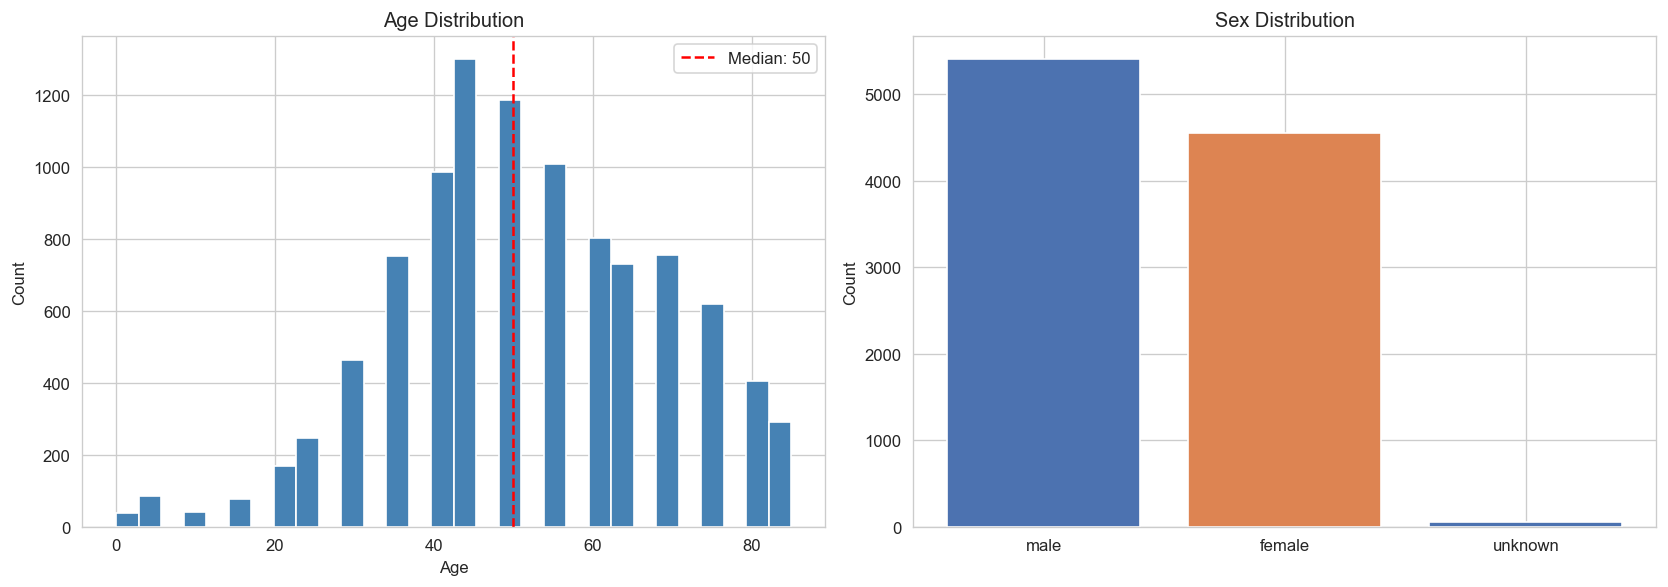

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age distribution
if 'age' in df.columns:
    df['age'].dropna().hist(bins=30, ax=axes[0], color='steelblue', edgecolor='white')
    axes[0].set_xlabel('Age')
    axes[0].set_ylabel('Count')
    axes[0].set_title('Age Distribution')
    axes[0].axvline(df['age'].median(), color='red', linestyle='--',
                    label=f'Median: {df["age"].median():.0f}')
    axes[0].legend()

# Sex distribution
if 'sex' in df.columns:
    sex_counts = df['sex'].value_counts()
    axes[1].bar(sex_counts.index, sex_counts.values, color=['#4C72B0', '#DD8452'])
    axes[1].set_ylabel('Count')
    axes[1].set_title('Sex Distribution')

plt.tight_layout()
fig.savefig(RESULTS_DIR / 'demographics.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 7. Localization Distribution

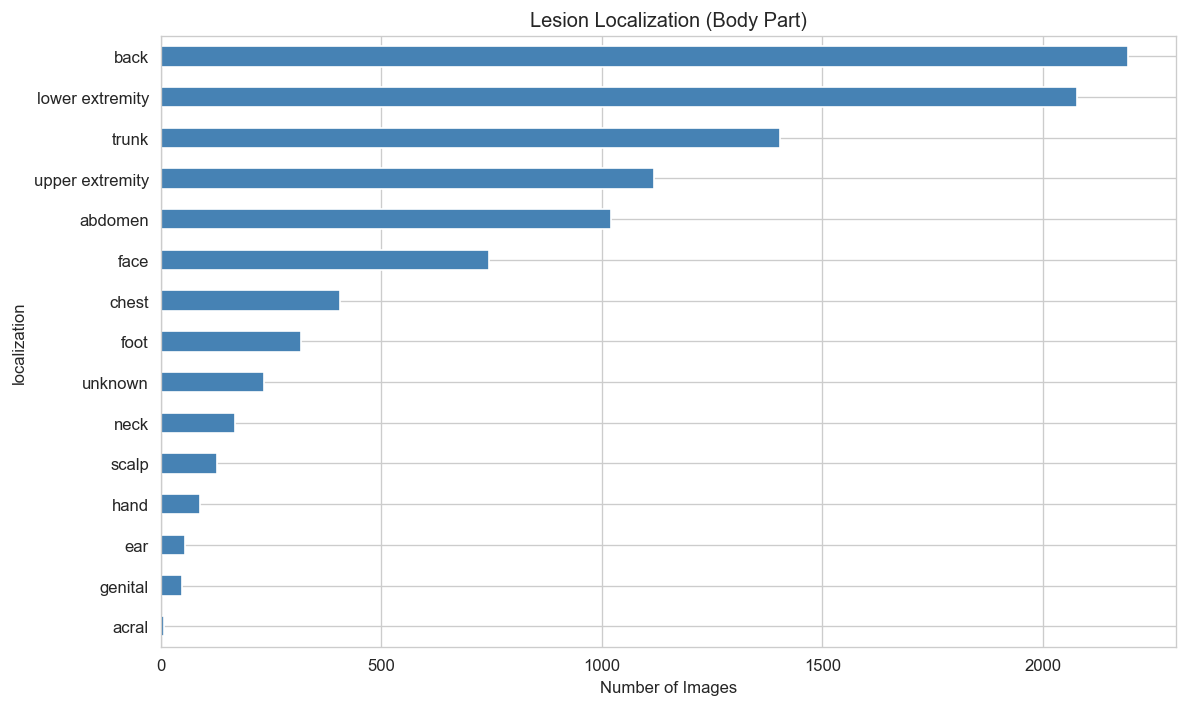

In [11]:
if 'localization' in df.columns:
    fig, ax = plt.subplots(figsize=(10, 6))

    loc_counts = df['localization'].value_counts()
    loc_counts.plot(kind='barh', ax=ax, color='steelblue')
    ax.set_xlabel('Number of Images')
    ax.set_title('Lesion Localization (Body Part)')
    ax.invert_yaxis()
    plt.tight_layout()
    fig.savefig(RESULTS_DIR / 'localization.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print('No localization column')

---
## 8. Pixel Intensity Distribution

Let's look at the average color channels across different classes — this can reveal if certain conditions have distinct color profiles.

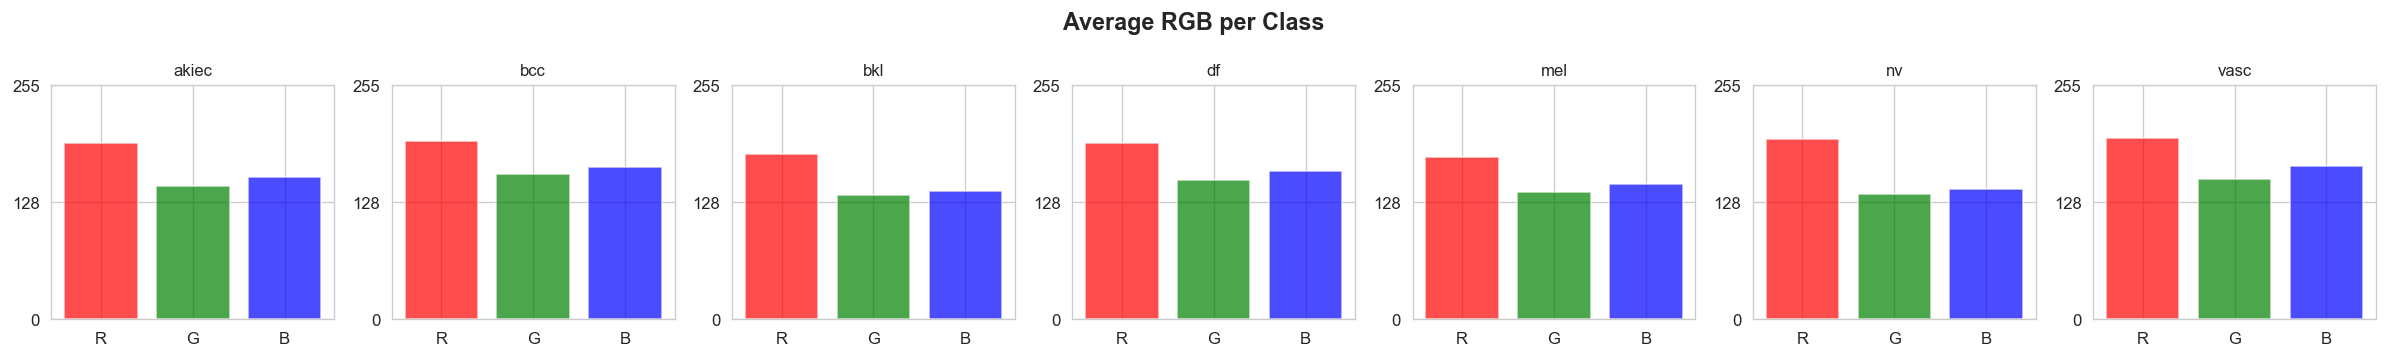

In [12]:
# Average RGB values per class
fig, axes = plt.subplots(1, len(CLASS_NAMES), figsize=(20, 3))

for i, cls in enumerate(CLASS_NAMES):
    class_df = df[df['dx'] == cls].sample(n=min(20, len(df[df['dx'] == cls])), random_state=42)
    r_vals, g_vals, b_vals = [], [], []

    for _, row in class_df.iterrows():
        img_path = find_image(row['image_id'])
        if img_path:
            img = np.array(Image.open(img_path))
            r_vals.append(img[:,:,0].mean())
            g_vals.append(img[:,:,1].mean())
            b_vals.append(img[:,:,2].mean())

    axes[i].bar(['R', 'G', 'B'],
                [np.mean(r_vals), np.mean(g_vals), np.mean(b_vals)],
                color=['red', 'green', 'blue'], alpha=0.7)
    axes[i].set_title(cls, fontsize=10)
    axes[i].set_ylim(0, 255)
    axes[i].set_yticks([0, 128, 255])

plt.suptitle('Average RGB per Class', fontsize=14, fontweight='bold')
plt.tight_layout()
fig.savefig(RESULTS_DIR / 'rgb_per_class.png', dpi=150, bbox_inches='tight')
plt.show()

---
## Summary

Key findings from our EDA:

1. **Class imbalance** — Melanocytic Nevus dominates, rare classes need special handling
2. **Image dimensions** — All images are the same size, we'll resize to 128x128 for CPU training
3. **Duplicate lesions** — Same lesion can appear multiple times, need careful train/test splitting
4. **Demographics** — Dataset includes age, sex, and body location metadata
5. **Color profiles** — Different conditions may have subtle color differences

### Next Steps

-> Move on to **02_model_training.ipynb** to build and train our classification model!